In [2]:
import pandas as pd
import numpy as np
import scipy.stats

In [3]:
bancos=pd.read_excel('Base bancos.xlsx')

In [4]:
bancos.head(10)

,Banco,Tamaño,Año-Mes,Solvencia,ROE,Patrimonio/Depositos,Eficiencia,Liquidez,Intermediación Financiera,Morosidad,Calidad de Activos,Porcentaje de Encaje
0,AMAZONAS,Pequeño,2022-11-01,0.107671,0.002908,0.015952,0.942084,0.265100,0.699136,1.786266e-02,1.082590,0.009437
1,AUSTRO,Mediano,2022-11-01,0.110605,0.048930,0.015334,0.933374,0.238520,0.781656,2.640504e-02,1.027442,0.063784
2,BOLIVARIANO,Mediano,2022-11-01,0.124345,0.134694,0.022753,1.534468,0.298611,0.853500,8.628960e-03,1.301590,0.062625
3,CAPITAL,Pequeño,2022-11-01,0.161530,-0.199900,0.034163,0.217289,0.160572,0.740074,4.777019e-02,0.876332,0.052780
4,CITIBANK,Mediano,2022-11-01,0.176074,0.025615,0.019253,0.923190,0.367181,0.619645,5.503718e-09,13.754841,0.160410
5,CODESARROLLO,Pequeño,2022-11-01,0.149431,0.047690,0.019193,0.866386,0.253984,1.196098,5.127051e-02,0.999286,0.070375
6,COMERCIAL DE MANABI,Pequeño,2022-11-01,0.306932,0.011135,0.043967,1.073420,0.320169,0.804792,1.477388e-01,1.031203,0.145538
7,COOPNACIONAL,Pequeño,2022-11-01,0.265329,0.032749,0.052545,1.122029,0.468259,0.541728,4.214168e-04,1.129879,0.042853
8,D-MIRO,Pequeño,2022-11-01,0.198827,-0.261776,0.047509,0.212554,0.344333,1.668215,1.336490e-01,1.108558,0.034425
9,DELBANK,Pequeño,2022-11-01,0.484697,-0.016655,0.058662,0.814890,0.379480,1.065246,2.165481e-02,1.675887,0.054655


In [5]:
bancos.isnull().sum()

Banco                        0
Tamaño                       0
Año-Mes                      0
Solvencia                    0
ROE                          0
Patrimonio/Depositos         0
Eficiencia                   0
Liquidez                     0
Intermediación Financiera    0
Morosidad                    0
Calidad de Activos           0
Porcentaje de Encaje         0
dtype: int64

In [20]:
# Punto 1. hacer un análisis descrptivo de la solvencia por tamaño
bancos.groupby('Tamaño')['Solvencia'].describe()

,count,mean,std,min,25%,50%,75%,max
Tamaño,,,,,,,,
Grande,4.0,0.141085,0.019928,0.121259,0.128344,0.138035,0.150776,0.167013
Mediano,9.0,0.163982,0.069429,0.110605,0.124345,0.139480,0.176074,0.337621
Pequeño,11.0,0.212245,0.107691,0.107671,0.155480,0.162428,0.237130,0.484697


In [9]:
# 2. Realizar un discretización de la variable Solvencia (4 partes iguales)
bancos['Solvencia_bin']=pd.qcut(bancos["Solvencia"],q=4)

In [10]:
#3. Realizar una tabla de contingencia de variable Solvencia_bin yl a variable Tamaño
tbl_cont=pd.crosstab(bancos['Solvencia_bin'], bancos['Tamaño'])

In [11]:
tbl_cont

Tamaño,Grande,Mediano,Pequeño
Solvencia_bin,,,
"(0.107, 0.13]",1,3,2
"(0.13, 0.155]",2,3,1
"(0.155, 0.188]",1,2,3
"(0.188, 0.485]",0,1,5


In [12]:
# 5. Testear si existe dependencia entre las variables solvencia_bin y Tamaño
chi_test=scipy.stats.chi2_contingency(tbl_cont)
chi_test

(6.404040404040404,
 0.37948227961846387,
 6,
 array([[1.  , 2.25, 2.75],
        [1.  , 2.25, 2.75],
        [1.  , 2.25, 2.75],
        [1.  , 2.25, 2.75]]))

 Como p-valor de la prueba chi es 0,38 > 0,05 No podemos rechazar Ho: la independencia entre las dos variables. En otras palabras decimos que el Tamaño y la solvencia_bin son independientes.

In [13]:
# 5. Calcular la matriz de correlaciones entre las variables numéricas de la base de bancos 
bancos.corr()

,Solvencia,ROE,Patrimonio/Depositos,Eficiencia,Liquidez,Intermediación Financiera,Morosidad,Calidad de Activos,Porcentaje de Encaje
Solvencia,1.000000,-0.220253,0.839610,-0.198082,0.312447,0.072652,0.251508,0.015220,0.018532
ROE,-0.220253,1.000000,-0.500965,0.900831,0.162635,0.213649,-0.568464,-0.013922,0.241900
Patrimonio/Depositos,0.839610,-0.500965,1.000000,-0.393004,0.254543,0.109754,0.478633,-0.111410,-0.206475
Eficiencia,-0.198082,0.900831,-0.393004,1.000000,0.132760,0.104138,-0.479266,-0.064018,0.143218
Liquidez,0.312447,0.162635,0.254543,0.132760,1.000000,0.407880,-0.056448,0.205857,0.084932
Intermediación Financiera,0.072652,0.213649,0.109754,0.104138,0.407880,1.000000,0.133339,-0.111226,-0.204239
Morosidad,0.251508,-0.568464,0.478633,-0.479266,-0.056448,0.133339,1.000000,-0.230953,0.032016
Calidad de Activos,0.015220,-0.013922,-0.111410,-0.064018,0.205857,-0.111226,-0.230953,1.000000,0.471635
Porcentaje de Encaje,0.018532,0.241900,-0.206475,0.143218,0.084932,-0.204239,0.032016,0.471635,1.000000


In [14]:
r, p = scipy.stats.pearsonr(bancos['Solvencia'],bancos['ROE'])

In [15]:
r

-0.22025276697360552

In [16]:
p

0.30105121794870837

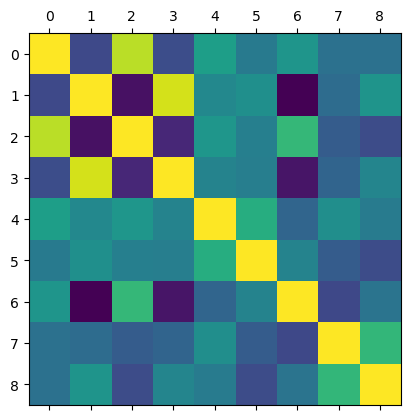

In [17]:
# Bonus mapa de calor correlaciones
import matplotlib.pyplot as plt

plt.matshow(bancos.corr())
plt.show()